# Generate rate capability plots

In this notebook we use PyBaMM to generate rate capability plots and Ragone plots. Rate capability plots show discharge capacity at different C-rates. Similarly, multiplying the discharge current and capacity by the average discharge voltage we can obtain Ragon plots (that is energy vs power).

First we need to import pybamm and the other necessary packages.

In [1]:
import pybamm
import numpy as np
import matplotlib.pyplot as plt

In this example we use the SPMe model with the default settings, but we could change it to other models, parameters, geometries... For example, you generate rate capability plots using the DFN model in [this script](https://github.com/pybamm-team/PyBaMM/blob/master/examples/scripts/rate_capability.py). 

In [2]:
model = pybamm.lithium_ion.SPMe()

We now cycle a loop of different C-rates and run full discharge simulations for each C-rate. For each simulation we register the final discharge capacity, the applied current and the average discharge voltage. We can then generate the rate capability and the Ragone plots.

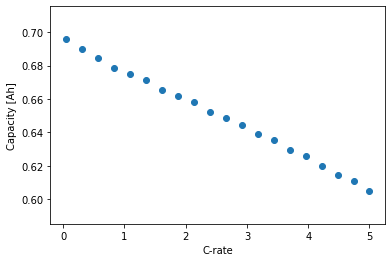

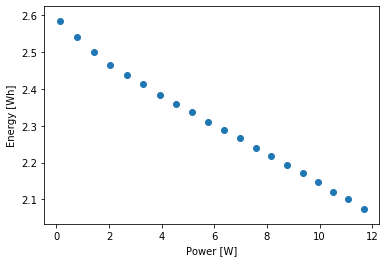

In [3]:
C_rates = np.linspace(0.05, 5, 20)
capacities = np.zeros_like(C_rates)
currents = np.zeros_like(C_rates)
voltage_av = np.zeros_like(C_rates)

for i, C_rate in enumerate(C_rates):
    experiment = pybamm.Experiment(
        ["Discharge at {:.4f}C until 3.2V".format(C_rate)],
        period="{:.4f} seconds".format(10 / C_rate)
    )
    sim = pybamm.Simulation(
        model,
        experiment=experiment,
        solver=pybamm.CasadiSolver(dt_max=120)
    )
    sim.solve()

    time = sim.solution["Time [s]"].entries
    capacity = sim.solution["Discharge capacity [A.h]"]
    current = sim.solution["Current [A]"]
    voltage = sim.solution["Terminal voltage [V]"]

    capacities[i] = capacity(time[-1])
    currents[i] = current(time[-1])
    voltage_av[i] = np.mean(voltage(time))

plt.figure(1)
plt.scatter(C_rates, capacities)
plt.xlabel('C-rate')
plt.ylabel('Capacity [Ah]')

plt.figure(2)
plt.scatter(currents * voltage_av, capacities * voltage_av)
plt.xlabel('Power [W]')
plt.ylabel('Energy [Wh]')

plt.show()